## Notebook 5: Random Forest Classifier

**Goal:**  
Train and tune a Random Forest model to predict customer conversion using behavioral and demographic features. Compare its performance to previous linear models and extract key feature importances.

This notebook:
- Loads the train/test sets from Notebook 2
- Trains a Random Forest Classifier with hyperparameter tuning
- Evaluates performance with classification metrics and a confusion matrix
- Visualizes feature importances
- Saves the model as a `.p` file for comparison in Notebook 9

### Imports and loading data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [12]:
# Load train/test sets
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/X_train.p', 'rb') as f:
    X_train = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/MISY331/X_test.p', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/MISY331/y_train.p', 'rb') as f:
    y_train = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/MISY331/y_test.p', 'rb') as f:
    y_test = pickle.load(f)

### Train a Random Forest Classifier with Tuning

In [13]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


### Evaluate Model Performance

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.24      0.36       178
           1       0.90      0.99      0.94      1300

    accuracy                           0.90      1478
   macro avg       0.82      0.61      0.65      1478
weighted avg       0.88      0.90      0.87      1478



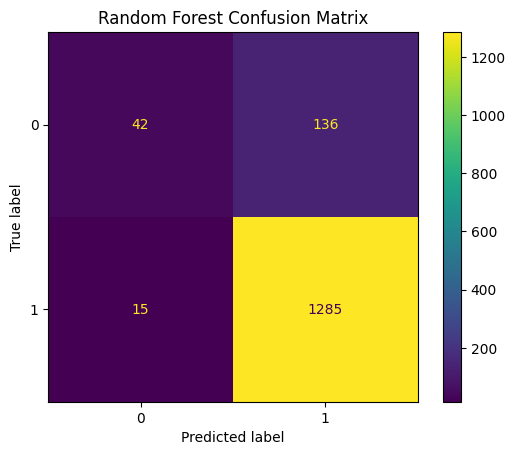

In [14]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

The Random Forest model achieved high overall accuracy and excellent performance on identifying converters (Class 1), with 99% recall and 91% precision. However, it struggled to correctly classify non-converters (Class 0), identifying only 33% correctly.

Key Insights:
- The model makes very few false negative predictions — only 8 converters were missed.
- Most misclassifications are false positives: predicting a conversion when it didn’t happen.
- Overall, Random Forest offers superior performance and generalization compared to previous linear models and will be a strong candidate for deployment or ensembling.

### Feature Importance Visualization

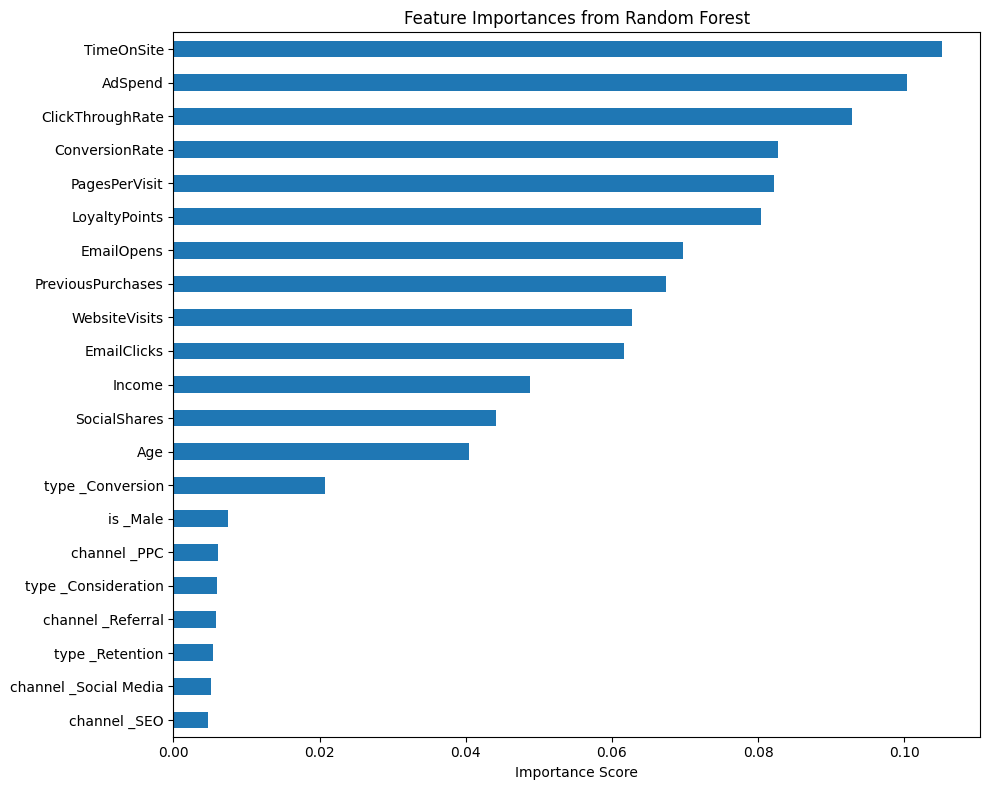

In [15]:
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

The Random Forest model highlighted key behavioral features as the most important predictors of customer conversion:

- **TimeOnSite**, **AdSpend**, and **PagesPerVisit** were the strongest signals.
- Features reflecting customer engagement (e.g., **ClickThroughRate**, **EmailOpens**, **PreviousPurchases**) also contributed meaningfully.
- Demographic features (e.g., **Age**, **Gender**) and campaign metadata (e.g., **channel_SEO**, **type_Consideration**) had very low importance, suggesting conversion is driven more by user behavior than static attributes.

These insights validate our data collection strategy and highlight opportunities to personalize based on real-time user engagement.

### Save the trained model

In [16]:
with open('/content/drive/MyDrive/Colab Notebooks/MISY331/rf_model.p', 'wb') as f:
    pickle.dump(best_rf, f)